In [25]:
#importing the requirements
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter


In [49]:
#Loading the Movies dataset
movies = pd.read_excel("C:\\Users\\kayce\\OneDrive\\Desktop\\Movies.xlsx")

#Checking for missing values
print(movies.isnull().sum())
#Filling missing values with 'Unknown'
movies.fillna("Unknown", inplace=True)
print(movies.isnull().sum())
print(movies.head())


show_id           0
type              0
title             0
country         417
release_year      0
listed_in         0
dtype: int64
show_id         0
type            0
title           0
country         0
release_year    0
listed_in       0
dtype: int64
  show_id   type                                             title  \
0     s62  Movie  Naruto the Movie 2: Legend of the Stone of Gelel   
1    s130  Movie                                An Unfinished Life   
2    s152  Movie                                         Initial D   
3    s203  Movie                                 Kyaa Kool Hai Hum   
4    s579  Movie                               Memoirs of a Geisha   

                        country  release_year  \
0                         Japan          2005   
1        Germany, United States          2005   
2              China, Hong Kong          2005   
3                         India          2005   
4  France, Japan, United States          2005   

                              

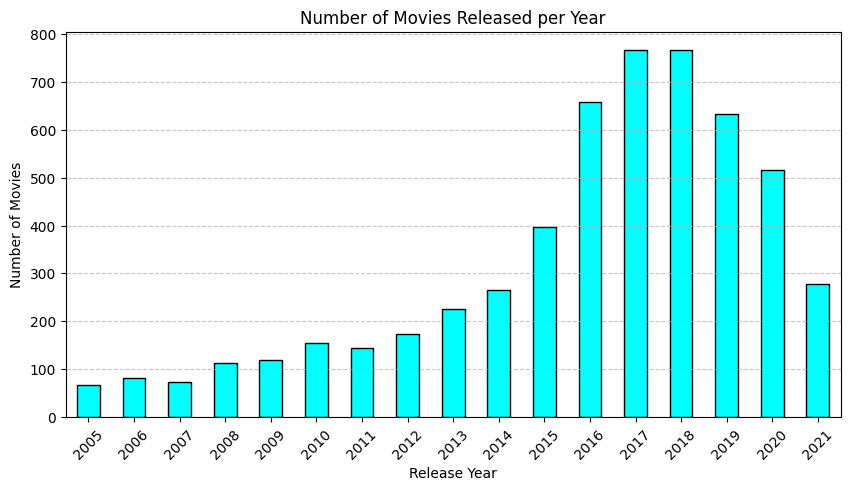

In [ ]:
#YEAR
# Count number of movies per year
year_counts = movies["release_year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
year_counts.plot(kind="bar", color="cyan", edgecolor="black")

plt.title("Number of Movies Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


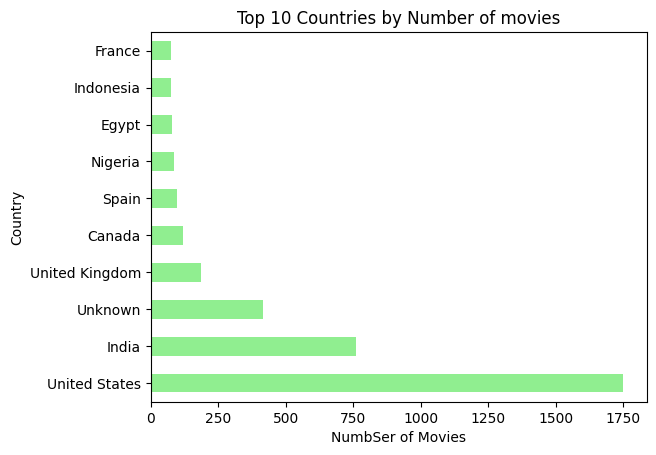

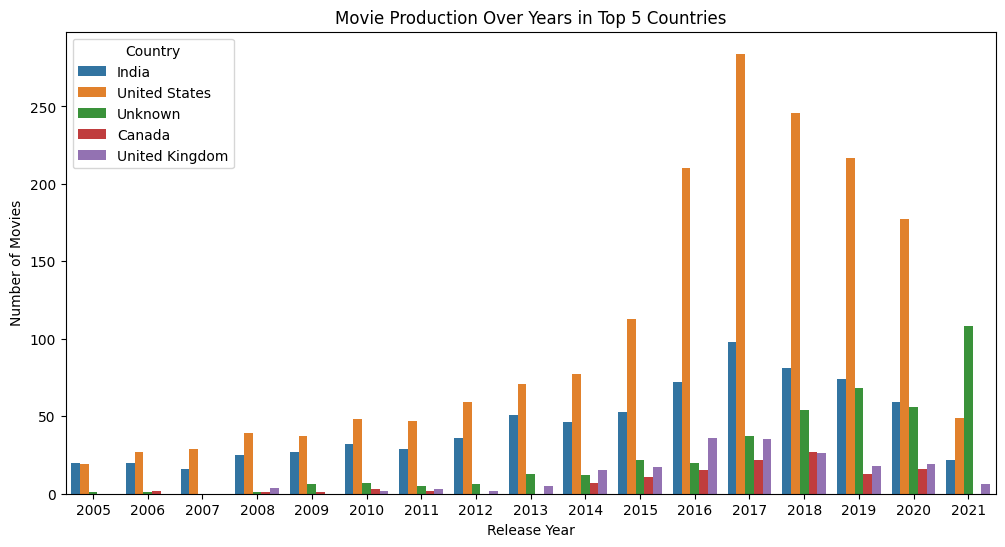

In [ ]:
#COUNTRIES
#Visualizing the top countries in movie production
top_countries = movies["country"].value_counts().head(10)
top_countries.plot(kind="barh", color="lightgreen")
plt.title("Top 10 Countries by Number of movies")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()

#Visualizing the top 5 countries movie production against year
top_5_countries = movies[movies["country"].isin(top_countries.index[:5])]
plt.figure(figsize=(12, 6))
sns.countplot(data=top_5_countries, x="release_year", hue="country")
plt.title("Movie Production Over Years in Top 5 Countries")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Country")
plt.show()




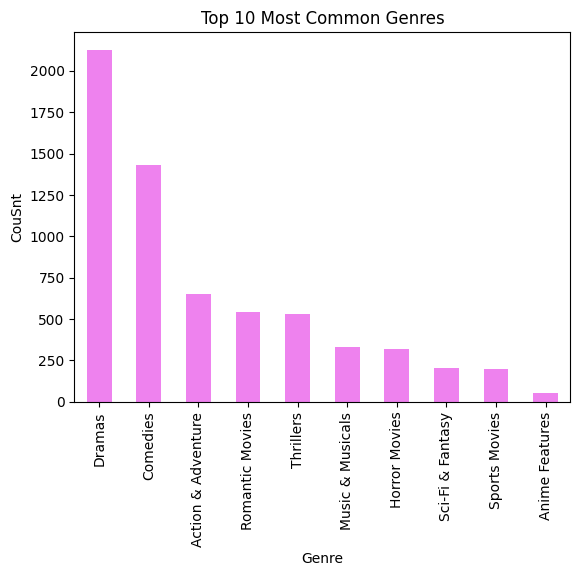

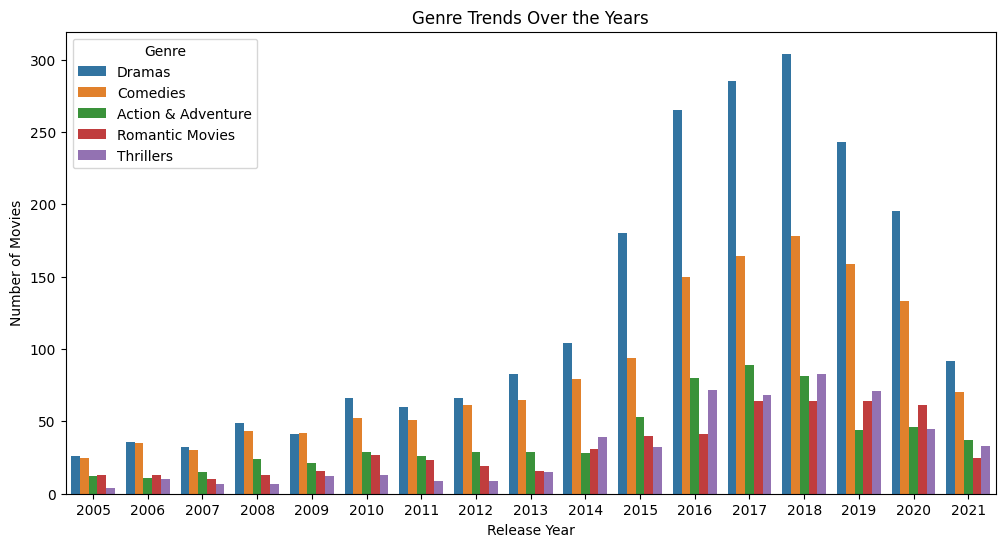

In [ ]:
#GENRES
#Visualizing the most common genres
all_genres = movies["listed_in"].dropna().str.split(", ")
genre_counts = Counter([g for sublist in all_genres for g in sublist])
excluded = ["International Movies", "Independent Movies", "Documentaries", "Stand-Up Comedy", "Music", "Children & Family Movies", "TV Shows", "LGBTQ Movies", "Faith & Spirituality"]
for ex in excluded:
    genre_counts.pop(ex, None)
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind="bar", color="violet")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

#Visualizing genre trends over the years
movies_exploded = movies.assign(listed_in=movies["listed_in"].str.split(", ")).explode("listed_in")
movies_exploded = movies_exploded[~movies_exploded["listed_in"].isin(["International Movies", "Independent Movies", "Documentaries", "Stand-Up Comedy", "Music", "Children & Family Movies", "TV Shows", "LGBTQ Movies", "Faith & Spirituality"])]
plt.figure(figsize=(12, 6)) 
sns.countplot(data=movies_exploded, x="release_year", hue="listed_in", order=sorted(movies["release_year"].unique()), hue_order=movies_exploded["listed_in"].value_counts().index[:5])
plt.title("Genre Trends Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.legend(title="Genre")
plt.show()